<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_5_%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0(Support_Vector_Machines)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [202]:
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['seaborn-whitegrid'])

import warnings 
warnings.filterwarnings('ignore')

In [203]:
from sklearn.svm import SVC, SVR
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#차원축소에 사용되는 패키지
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [204]:
X, y = load_boston(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVR()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.19315594710601414
0.20156980505236877


### SVM을 사용한 분류 모델 (SVC)

In [205]:
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.92018779342723
0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, LinearSVC, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [ ]:
X, y = load_boston(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)

print(linear_svr.score(X_train, y_train))
print(linear_svr.score(X_test, y_test))

poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train, y_train)

print(poly_svr.score(X_train, y_train))
print(poly_svr.score(X_test, y_test))

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train, y_train)

print(rbf_svr.score(X_train, y_train))
print(rbf_svr.score(X_test, y_test))

0.7090694765671062
0.6578623366163128
0.20379249908643815
0.20577161325673976
0.20453970185283743
0.2098866405691382


In [ ]:
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

print(linear_svc.score(X_train, y_train))
print(linear_svc.score(X_test, y_test))

poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train, y_train)

print(poly_svc.score(X_train, y_train))
print(poly_svc.score(X_test, y_test))

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

print(rbf_svc.score(X_train, y_train))
print(rbf_svc.score(X_test, y_test))

0.9671361502347418
0.958041958041958
0.9084507042253521
0.9370629370629371
0.9131455399061033
0.9440559440559441


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [ ]:
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

#cost와 함께 gamma라는 매개변수를 추가적으로 조정
# C는 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정한다. 작을 수록 많이 허용하고, 클 수록 적게 허용한다.
# gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정 클수록 작은 표준편차를 갖는다
poly_svc = SVC( kernel="poly", degree=2, C=0.1,  gamma="auto")
poly_svc.fit(X_train, y_train)

print(poly_svc.score(X_train, y_train))
print(poly_svc.score(X_test, y_test))

0.9835680751173709
0.993006993006993


In [ ]:
rbf_svc = SVC( kernel="rbf", C=2,  gamma="scale")
rbf_svc.fit(X_train, y_train)

print(rbf_svc.score(X_train, y_train))
print(rbf_svc.score(X_test, y_test))

0.9154929577464789
0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [ ]:
X, y = load_breast_cancer(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

print(rbf_svc.score(X_train, y_train))
print(rbf_svc.score(X_test, y_test))

0.9154929577464789
0.9370629370629371


In [ ]:
#scaler(계수 : 변수에 일정한 수를 곱한 값)
#fit_transform / transform 차이 
#train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 되는 것
#테스트 데이터에 fit_transform를 적용할 경우 test 값도 학습됨

scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)

model = SVC()
model.fit(X_std_train, y_train)

print(model.score(X_std_train, y_train))
print(model.score(X_std_test, y_test))

0.9835680751173709
0.986013986013986


In [ ]:
scaler = MinMaxScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)

model = SVC()
model.fit(X_std_train, y_train)

print(model.score(X_std_train, y_train))
print(model.score(X_std_test, y_test))

0.9812206572769953
0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [206]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [213]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


model = SVR(kernel= 'linear')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.735869834872335
0.6045420959845871


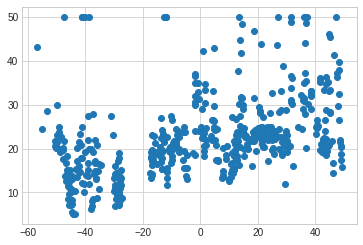

In [216]:
#비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지가 있다. 
#가장 일반적인 동기는 시각화, 데이터 압축, 지도학습을 위한 처리를 위해 정보가 더 잘드러나는 표현을 찾기 위함
#매니폴드 알고리즘 중 하나
#매니폴드 학습은 탐색적 데이터 분석에 유용, 지도학습에는 거의 사용하지 않음.
#t-SNE의 아이디어는 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리떨어진 포이트는 멀어지게 만드는 것. 
#이웃 데이터 포인트에 대한 정보를 보전하려고함. 

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

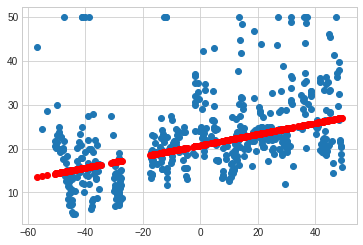

In [217]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

## **cross_validate**

*참고(https://davinci-ai.tistory.com/18)

1.데이터가 독립적이고 동일한 분포를 가진 경우
* KFold, RepeatedKFold, LeaveOneOut(LOO), LeavePOutLeaveOneOut(LPO)

2.동일한 분포가 아닌 경우
* StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit

3.그룹화된 데이터의 경우
* GroupKFold, LeaveOneGroupOut, LeavePGroupsOut, GroupShuffleSplit

4.시계열 데이터의 경우
* TimeSeriesSplit




In [218]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.03318286, 0.02354884, 0.03570461, 0.03072405, 0.0255177 ]),
 'score_time': array([0.00333214, 0.0059135 , 0.00312829, 0.00323081, 0.00180006]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

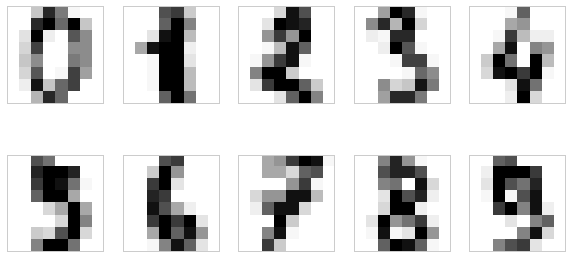

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5), subplot_kw = {'xticks':(), 'yticks':()})

for ax, imgs in zip(axes.ravel(), digits.images):
    ax.imshow(imgs)

Text(0, 0.5, '두 번째 주성분')

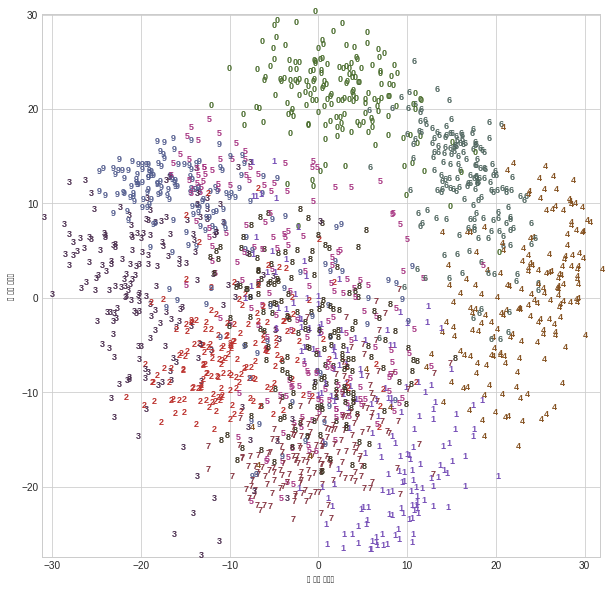

In [ ]:
from sklearn.decomposition import PCA

# 2차원으로 축소
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]] ,fontdict={'weight': 'bold', 'size':9}           )
## fontdict={'weight': 'bold', 'size':9}

plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

Text(0, 0.5, 't-SNE 특성 1')

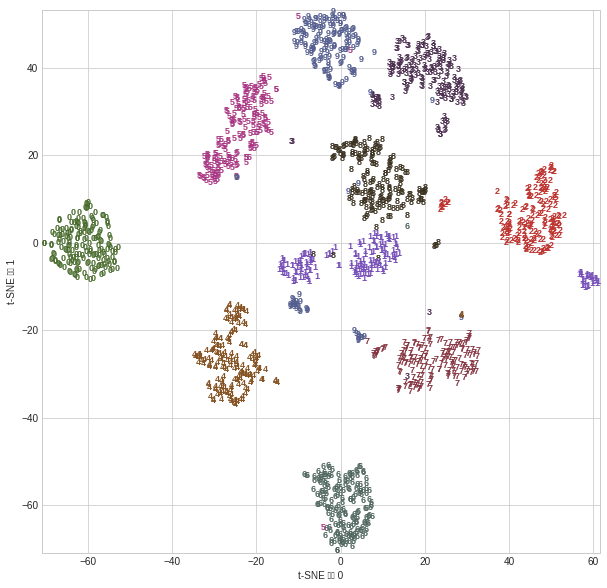

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
# TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용한다.
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
    
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

### 당뇨병

In [219]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [221]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = SVR(kernel='linear')

model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.4956586994235658
0.5260532839456427


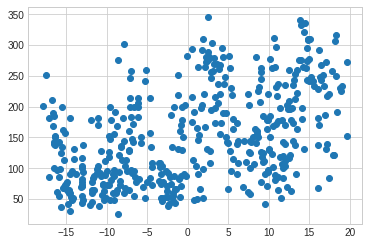

In [222]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

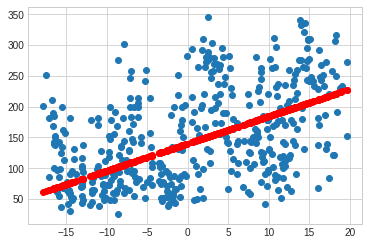

In [223]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')


In [224]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02488208, 0.03073454, 0.02448416, 0.012501  , 0.01515126]),
 'score_time': array([0.00265265, 0.0026176 , 0.00263047, 0.00250578, 0.00177479]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [225]:
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVR(kernel='linear'))])

paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [226]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_index_)
print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
0
0.4780769992158147


In [ ]:
dir(gs)

## Kernel SVR

### 보스턴 주택 가격

In [227]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = SVR(C=0.1, epsilon=1.0, kernel='linear')

model.fit(X_train, y_train)

model.score(X_train, y_train)
model.score(X_test, y_test)

0.5612221164905116

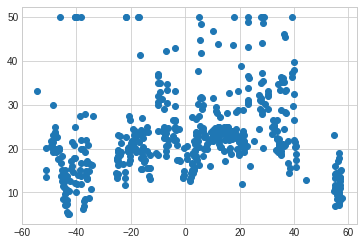

In [228]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

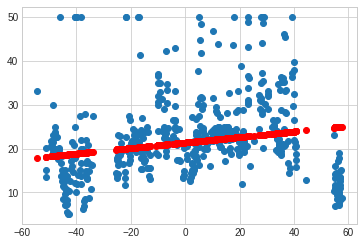

In [229]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [231]:
estimator = make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=1.0, kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02420378, 0.03108692, 0.03426123, 0.01461959, 0.03527379]),
 'score_time': array([0.00286365, 0.00291467, 0.01688075, 0.00280333, 0.0027566 ]),
 'test_score': array([0.76423988, 0.71418191, 0.50257117, 0.22469043, 0.28704003])}

In [232]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVR(kernel='rbf'))])

paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
#paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]

bostom_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

bostom_gs.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'polynomial', 'sigmoid',
                                            'linear']}],
             verbose=True)

In [233]:
print(bostom_gs.best_estimator_)
print(bostom_gs.best_params_)
print(bostom_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale', 'model__kernel': 'linear'}
0.49854468515517


### 당뇨병

In [235]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.4917888153340588
0.49089689349699417


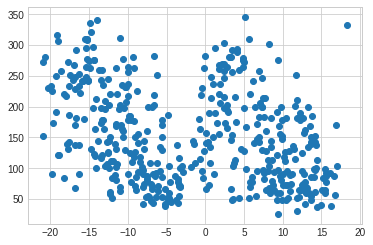

In [236]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

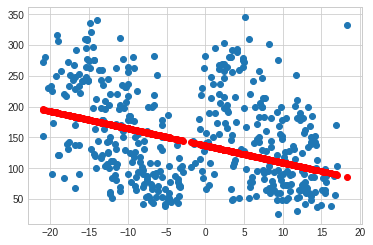

In [237]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [239]:
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.0273211 , 0.02309942, 0.01704764, 0.03384137, 0.02916527]),
 'score_time': array([0.0110724 , 0.0047965 , 0.00463295, 0.00488186, 0.00485754]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [241]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVR(kernel='rbf'))])

paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
#paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]

diabetes_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

diabetes_gs.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'polynomial', 'sigmoid',
                                            'linear']}],
             verbose=True)

In [242]:
print(diabetes_gs.best_estimator_)
print(diabetes_gs.best_params_)
print(diabetes_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale', 'model__kernel': 'linear'}
0.4780769992158147


In [243]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

In [244]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.49289988728917744
0.49266384091624615


## Linear SVC

### 유방암

In [245]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9912087912087912
0.9736842105263158


In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [246]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]

xx, yy = make_meshgrid(X0, X1)

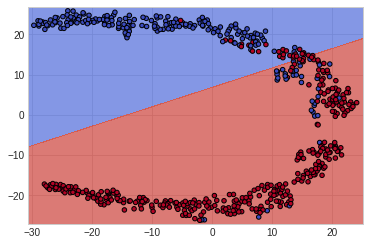

In [247]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [248]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01966   , 0.00728607, 0.00765371, 0.0062654 , 0.0044868 ]),
 'score_time': array([0.00136328, 0.00118613, 0.00112319, 0.00118136, 0.00071025]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [249]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVC(kernel='linear'))])

#paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01]}]

cancer_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

cancer_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [250]:
print(cancer_gs.best_estimator_)
print(cancer_gs.best_params_)
print(cancer_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
{'model__C': 0.1, 'model__gamma': 'scale'}
0.9736531594472908


In [251]:
model = cancer_gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [252]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9824175824175824
0.9824561403508771


### 붓꽃

In [254]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.975
0.9666666666666667


In [255]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]

xx, yy = make_meshgrid(X0, X1)

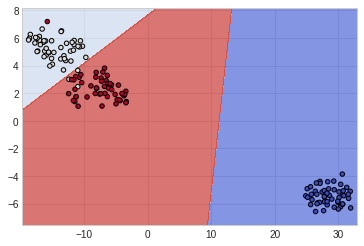

In [256]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [257]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00264621, 0.00282598, 0.00302482, 0.002244  , 0.00146675]),
 'score_time': array([0.00087452, 0.00086164, 0.00079918, 0.00077629, 0.00052047]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [258]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVC(kernel='linear'))])

#paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01]}]

cancer_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

cancer_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [259]:
print(cancer_gs.best_estimator_)
print(cancer_gs.best_params_)
print(cancer_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9666666666666668


In [260]:
model = cancer_gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [261]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.975
0.9666666666666667


### 와인

In [ ]:
wine = load_wine()
print(wine.keys())
print(wine.DESCR)
print(wine.target_names)

In [267]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

#scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [268]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]

xx, yy = make_meshgrid(X0, X1)

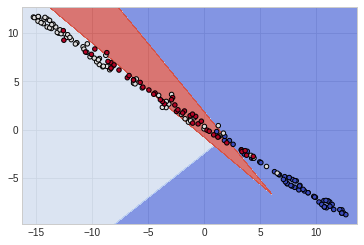

In [269]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01151943, 0.00855851, 0.00806308, 0.00748944, 0.00467777]),
 'score_time': array([0.00128484, 0.0013144 , 0.00115705, 0.00129557, 0.00190139]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [ ]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVC(kernel='linear'))])

#paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01]}]

cancer_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

cancer_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
print(cancer_gs.best_estimator_)
print(cancer_gs.best_params_)
print(cancer_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
{'model__C': 0.1, 'model__gamma': 'scale'}
0.9736531594472908


In [ ]:
model = cancer_gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9824175824175824
0.9824561403508771


## Kernel SVC

### 유방암

In [ ]:
wine = load_breast_cancer()
print(wine.keys())
print(wine.DESCR)
print(wine.target_names)

In [283]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.989010989010989
0.9736842105263158


In [284]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]

xx, yy = make_meshgrid(X0, X1)

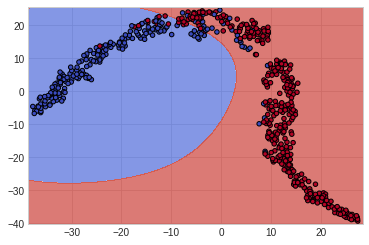

In [285]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [286]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.3s finished


{'fit_time': array([0.01026297, 0.02082014, 0.0128715 , 0.01771426, 0.00939846]),
 'score_time': array([0.00306988, 0.00271344, 0.00310469, 0.00301504, 0.00300193]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [291]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVC(kernel='rbf'))])

#paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01]}]

wine_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

wine_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [292]:
print(wine_gs.best_estimator_)
print(wine_gs.best_params_)
print(wine_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9736376339077782


In [293]:
model = wine_gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [294]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.989010989010989
0.9736842105263158


### 붓꽃

In [ ]:
iris = load_iris()
print(wine.keys())
print(wine.DESCR)
print(wine.target_names)

In [317]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9833333333333333
0.9333333333333333


In [318]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]

xx, yy = make_meshgrid(X0, X1)

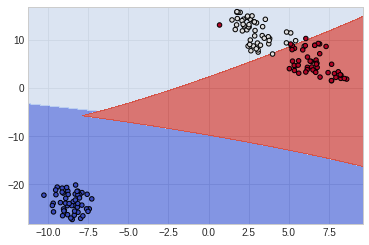

In [319]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [323]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00288773, 0.00307298, 0.00210285, 0.00276113, 0.00279212]),
 'score_time': array([0.00085473, 0.00087595, 0.00246978, 0.00085902, 0.00087786]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [326]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVC(kernel='linear'))])

#paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01]}]

iris_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

iris_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [328]:
print(iris_gs.best_estimator_)
print(iris_gs.best_params_)
print(iris_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9666666666666668


In [329]:
model = wine_gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [330]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9916666666666667
0.9


### 와인

In [ ]:
wine = load_wine()
print(wine.keys())
print(wine.DESCR)
print(wine.target_names)

In [331]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = SVC(kernel='rbf')
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9722222222222222


In [332]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]

xx, yy = make_meshgrid(X0, X1)

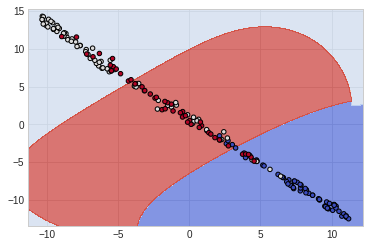

In [333]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [334]:
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(estimator=estimator, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00321174, 0.00234246, 0.00279617, 0.00270867, 0.00300455]),
 'score_time': array([0.00094557, 0.00063467, 0.00085449, 0.00082135, 0.00083208]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [337]:
#최적의 파라미터 확인
pipe = Pipeline([('scaler',StandardScaler()), ('model', SVC(kernel='linear'))])

#paramgrid = [{'model__kernel': ['rbf','polynomial','sigmoid','linear'],'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01],'model__epsilon':[1.0,0.1,0.01]}]
paramgrid = [{'model__gamma': ['scale','auto'],'model__C' : [1.0,0.1,0.01]}]

wine_gs = GridSearchCV(estimator = pipe, param_grid = paramgrid, n_jobs=multiprocessing.cpu_count(), cv=5, verbose=True, )

wine_gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [338]:
print(wine_gs.best_estimator_)
print(wine_gs.best_params_)
print(wine_gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
{'model__C': 0.1, 'model__gamma': 'scale'}
0.972063492063492


In [339]:
model = wine_gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [340]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0
